**# Ejemplo de Árbol de decisión**

In [5]:
######################
# adquirir datos
######################

import pandas as pd
# tener en cuenta que se debe tener aceso al archivo en el entorno
datos = pd.read_csv("./data/data.csv") # dataframe

print(datos.head())
# print(datos['Age'].describe())

   id  nombre       pelo  estatura      peso protector quemado
0  e1    sara      rubio  promedio    ligero        no      si
1  e2   diana      rubio      alta  promedio        si      no
2  e3  alexis    castaño      baja  promedio        si      no
3  e4     ana      rubio      baja  promedio        no      si
4  e5  emilia  pelirrojo  promedio    pesado        no      si


In [6]:
######################
# pre procesando datos
######################

# categorizar datos
peloCategorizado = {"rubio":0, "castaño":1, "pelirrojo":2}
datos["pelo"] = datos["pelo"].map(peloCategorizado)

# categorizar estatura
estaturaCategorizado = {"baja":0, "promedio":1, "alta":2}
datos["estatura"] = datos["estatura"].map(estaturaCategorizado)

# categorizar peso
pesoCategorizado = {"ligero":0, "promedio":1, "pesado":2}
datos["peso"] = datos["peso"].map(pesoCategorizado)

#categorizar protector
protectorCategorizado = {"no":0, "si":1}
datos["protector"] = datos["protector"].map(protectorCategorizado)

#categorizar quemado
quemadoCategorizado = {"no":0, "si":1}
datos["quemado"] = datos["quemado"].map(quemadoCategorizado)

print(datos)

   id    nombre  pelo  estatura  peso  protector  quemado
0  e1      sara     0         1     0          0        1
1  e2     diana     0         2     1          1        0
2  e3    alexis     1         0     1          1        0
3  e4       ana     0         0     1          0        1
4  e5    emilia     2         1     2          0        1
5  e6     pedro     1         2     2          0        0
6  e7      juan     1         1     2          0        0
7  e8  catalina     0         0     0          1        0


In [7]:
######################
# split datos
######################

# identificar característias y objetivo
caracteristicas = ["pelo", "estatura", "peso", "protector"]
X = datos[caracteristicas] # sub selección de columnas del dataframe
y = datos['quemado']

# dividir datos en trainset y testset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
######################
# modelar árbol de decisión
######################
from sklearn import tree

# definir modelo
dtree = tree.DecisionTreeClassifier(criterion="gini")  # id3
# entrenar modelo
dtree.fit(X_train, y_train)
# usar modelo
y_test_class = dtree.predict(X_test[caracteristicas])

[[0 1]
 [2 0]]


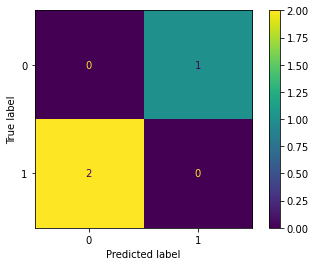

In [9]:
######################
# analizar performance
######################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_class)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()

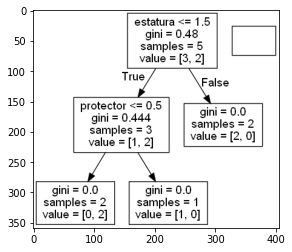

In [15]:
from matplotlib import image as pltimg
from matplotlib import pyplot as plt
import pydotplus

# data = tree.export_graphviz(dtree, feature_names=caracteristicas,out_file=None)
# graph = pydotplus.graph_from_dot_data(data)
# graph.write_png("mi_arbol.png")

img = pltimg.imread("mi_arbol.png")
imgplot = plt.imshow(img)
plt.show()